In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
my_stat = pd.read_csv("my_stat_1.csv")
my_stat.head(10)

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [32]:
subset_1 = my_stat.iloc[0:10,[0,2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [34]:
subset_2 = my_stat.iloc[:,[1,3]].drop([0,4])
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [36]:
subset_1 = my_stat.loc[(my_stat.V3 == "A") & (my_stat.V1 > 0)]
subset_1

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [37]:
subset_2 = my_stat.loc[(my_stat.V2 != 10) | (my_stat.V4 >= 1)]
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [56]:
#my_stat = my_stat.assign(V5 = my_stat["V1"] + my_stat["V4"],
#                         V6 = np.log(my_stat["V2"]))
#my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [119]:
my_stat = my_stat.rename(columns={
    "V1":"session_value",
    "V2":"group",
    "V3":"time",
    "V4":"n_users"
})
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [121]:
my_stat["session_value"] = my_stat["session_value"].fillna(value=0)
my_stat_median = my_stat["n_users"].loc[my_stat["n_users"]>=0].median()
my_stat.loc[my_stat["n_users"]<0, "n_users"] = my_stat_median
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


In [132]:
my_stat = my_stat.rename(columns={
    "session_value":"mean_session_value"
})
mean_session_value_data = my_stat.groupby("group", as_index=False).aggregate({
    "mean_session_value":"mean"
})

mean_session_value_data

,group,mean_session_value
0,A,0.8
1,B,0.8


In [25]:
students_perfomance = pd.read_csv("/home/worker/PycharmProjects/Python_study/Home/Neuro/Введение в Data Science и машинное обучение/StudentsPerformance.csv")

In [26]:
students_perfomance.loc[(students_perfomance.gender == "female") & (students_perfomance["writing score"] > mean_wr_sco)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [27]:
mean_wr_sco = students_perfomance["writing score"].mean()
mean_wr_sco

68.054

In [28]:
students_perfomance.loc[students_perfomance.lunch == "free/reduced"].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [29]:
students_perfomance.loc[students_perfomance.lunch == "standard"].describe()


,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [30]:
students_perfomance.plot.scatter(x = "math_score", y="reading_score")

sns.lmplot(x = "math_score", y="reading_score",hue="gender", data=students_perfomance, fit_reg=False)

KeyError: 'math_score'

In [31]:
students_perfomance = students_perfomance.rename(columns=
                                                 {"parental level of education": "parental_level_of_education",
                                                     "test preparation course":"test_preparation_course",
                                                  "math score":"math_score",
                                                  "reading score":"reading_score",
                                                 "writing score":"writing_score"
                                                 })


In [32]:
students_perfomance.query("gender == 'female'")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [33]:
students_perfomance.filter(like="score")

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [34]:
mean_scores = students_perfomance.groupby(["gender","race/ethnicity"]).aggregate(
    {
        "math_score":"mean",
        "reading_score": "mean"
    }
)
mean_scores.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [35]:
students_perfomance.sort_values(["gender", "math_score"], ascending=False).groupby("gender").head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [36]:
students_perfomance = students_perfomance.assign(total_score_log = np.log())

ValueError: invalid number of arguments

In [37]:
dota_leg = pd.read_csv("https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv")

#dota_leg.groupby("legs").size()

dota_leg.groupby(["attack_type", "primary_attr"]).size()

attack_type  primary_attr
Melee        agi             19
             int              2
             str             35
Ranged       agi             18
             int             40
             str              3
dtype: int64

In [38]:
acc = pd.read_csv("accountancy.csv")
acc.head(5)
acc.groupby(["Type","Executor"]).aggregate({"Salary":"mean"})

Salary
Type Executor            
A    Loopa      58.000000
     Pupa      160.833333
B    Loopa     145.166667
     Pupa       77.000000
C    Loopa     154.333333
     Pupa       74.500000
D    Loopa     137.714286
     Pupa      146.500000
E    Loopa     164.000000
     Pupa      131.200000
F    Loopa     238.000000
     Pupa      136.250000

In [39]:
tabula = pd.read_csv("algae.csv")
tabula.groupby("genus").aggregate(
    {
        "sucrose":"mean",
        "alanin":"mean",
        "citrate":"mean",
        "glucose":"mean",
        "oleic_acid":"mean"
    }
)
tabula.loc[tabula.genus == "Fucus"].describe()

tabula.groupby("group").describe()

sucrose                                                             \
        count      mean       std       min       25%      50%       75%   
group                                                                      
brown     6.0  4.709666  2.336471  1.636122  3.070321  5.00397  6.773014   
green     3.0  4.008792  1.634817  2.452623  3.157047  3.86147  4.786877   
red       1.0  0.704580       NaN  0.704580  0.704580  0.70458  0.704580   

                alanin            ...   glucose           oleic_acid  \
            max  count      mean  ...       75%       max      count   
group                             ...                                  
brown  6.825467    6.0  3.103846  ...  3.866782  6.013219        6.0   
green  5.712284    3.0  3.997055  ...  3.041936  3.343707        3.0   
red    0.704580    1.0  3.176440  ...  3.242090  3.242090        1.0   

                                                                             
           mean       std       min       25%       50%       75%       max  
group                                                                        
brown  3.584995  2.094095  0.304573  2.672695  3.774952  4.652528  6.405165  
green  2.263472  0.735111  1.432514  1.980700  2.528886  2.678951  2.829016  
red    2.245538       NaN  2.245538  2.245538  2.245538  2.245538  2.245538  

[3 rows x 40 columns]

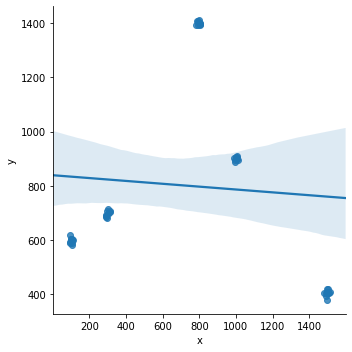

In [54]:
df=pd.read_csv("dataset_209770_6.txt", sep=" ")
sns.lmplot(x="x",y="y", data=df)

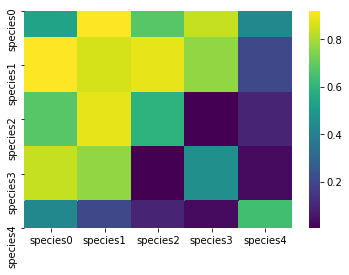

In [59]:
genome = pd.read_csv("genome_matrix.csv", index_col=0)
sns.heatmap(genome, cmap="viridis")

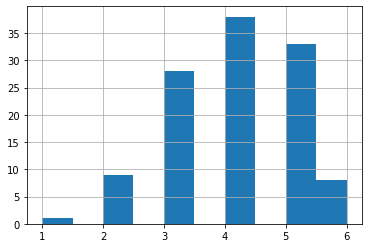

In [68]:
dota_heroes = pd.read_csv("dota_hero_stats.csv")
x = dota_heroes.roles.str.count(",")+1
x.hist()

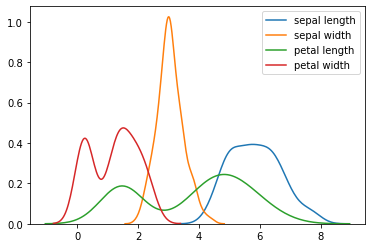

In [102]:
flower = pd.read_csv("iris.csv",index_col=0)
flower = flower.drop("species", axis=1)
for col in flower:
    sns.kdeplot(flower[col])
#sns.kdeplot(flower["petal length"])
#sns.kdeplot(flower["petal width"])
#sns.kdeplot(flower["sepal length"])
#sns.kdeplot(flower["sepal width"])

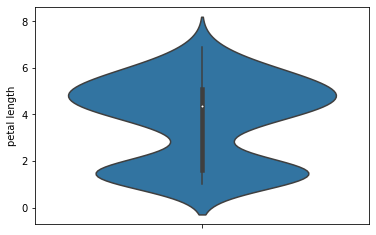

In [96]:
sns.violinplot(x=flower["petal length"], orient="v")

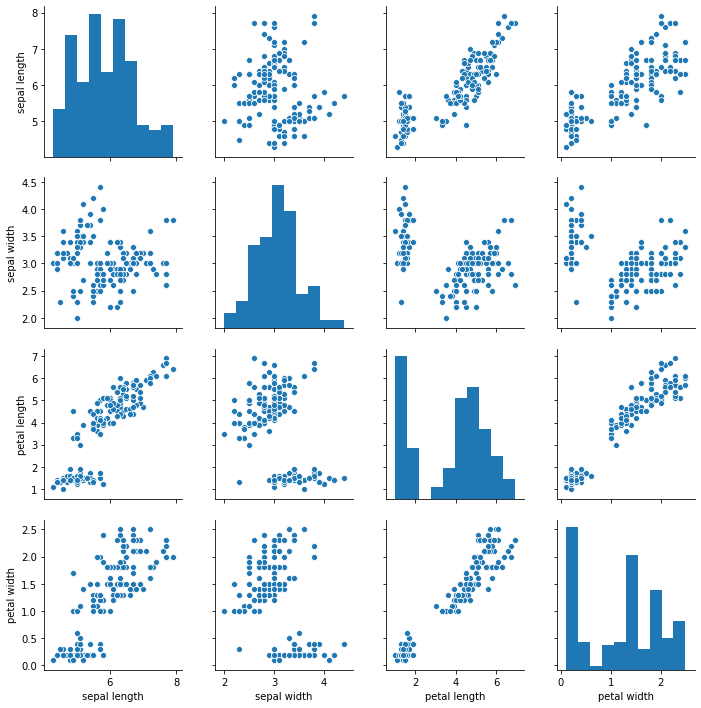

In [104]:
sns.pairplot(flower)

In [109]:
md = {"type":["A","A","B","B"], "value":[10,14,12,23]}
my_data = pd.DataFrame(data=md)